In [461]:
# Se importan las librerías a utilizar en todo el proyecto

import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from keras.callbacks import EarlyStopping

In [383]:
# Se carga el Dataframe preparado en la etapa de Análisis con información del estudiante

students = pd.read_csv('res/students_balanced.csv', sep=';')
del students['Unnamed: 0']

students.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23058 entries, 0 to 23057
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sum_click          23058 non-null  float64
 1   gender             23058 non-null  float64
 2   region             23058 non-null  float64
 3   highest_education  23058 non-null  float64
 4   studied_credits    23058 non-null  float64
 5   code_module        23058 non-null  int64  
dtypes: float64(5), int64(1)
memory usage: 1.1 MB


In [384]:
#Partición de datos externa

X = students.copy()
del X['code_module']
y = students['code_module']

X_training, X_test, y_training, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
valores_training, ocur_training = np.unique(y_training, return_counts=True)
print('Training: ', 'clases:', valores_training, ' ocurrencias: ', ocur_training)
valores_test, ocur_test = np.unique(y_test, return_counts=True)
print('Test: ', 'clases:', valores_test, ' ocurrencias: ', ocur_test)
display(X_training.head(5))
print(X_training.shape)

Training:  clases: [1 2 3 4 5 6 7]  ocurrencias:  [2661 2598 2651 2655 2655 2606 2620]
Test:  clases: [1 2 3 4 5 6 7]  ocurrencias:  [633 696 643 639 639 688 674]


,sum_click,gender,region,highest_education,studied_credits
2935,-1.023614,0.928989,1.113127,0.236378,1.549062
7719,1.901206,0.928989,1.621804,0.236378,-0.342115
5405,-1.007619,-1.076439,-0.412902,-1.162380,-0.342115
13868,0.379386,0.928989,1.113127,-1.162380,-1.287704
3948,0.436511,-1.076439,1.367466,-1.162380,-0.342115


(18446, 5)


In [385]:

# Convertir la serie a one-hot encoding
y_test_oh = pd.get_dummies(y_test)
y_training_oh = pd.get_dummies(y_training)

# Imprimir la representación one-hot encoding resultante
print("Serie original:")
print(y_training)
print("\nOne-hot encoding:")
print(y_training_oh)


Serie original:
2935     1
7719     3
5405     2
13868    5
3948     2
        ..
11964    4
21575    7
5390     2
860      1
15795    5
Name: code_module, Length: 18446, dtype: int64

One-hot encoding:
           1      2      3      4      5      6      7
2935    True  False  False  False  False  False  False
7719   False  False   True  False  False  False  False
5405   False   True  False  False  False  False  False
13868  False  False  False  False   True  False  False
3948   False   True  False  False  False  False  False
...      ...    ...    ...    ...    ...    ...    ...
11964  False  False  False   True  False  False  False
21575  False  False  False  False  False  False   True
5390   False   True  False  False  False  False  False
860     True  False  False  False  False  False  False
15795  False  False  False  False   True  False  False

[18446 rows x 7 columns]


In [616]:
import tensorflow as tf
from tensorflow.keras import layers, models
from keras import regularizers
from tensorflow.keras.regularizers import l2

# Modelo de red neuronal
model = models.Sequential([
    layers.Dense(32, activation='relu', input_shape=(5,), name='Layer_in'),    
#    layers.Dense(32, activation='relu', input_shape=(5,), kernel_regularizer=l2(0.01),name='Layer_in'),        
    layers.BatchNormalization(),
    layers.Dropout(0.1),
#    layers.Dense(32, activation='relu'),
#    layers.BatchNormalization(),
#    layers.Dropout(0.1),
#    layers.Dense(128, activation='relu'),
#    layers.BatchNormalization(),
#    layers.Dropout(0.1),
#    layers.Dense(264, activation='relu'),
#    layers.BatchNormalization(),
#    layers.Dropout(0.1),
    layers.Dense(64, activation='relu'),
#    layers.BatchNormalization(),
#    layers.Dropout(0.1),
    layers.Dense(32, activation='relu'),
#    layers.BatchNormalization(),
#    layers.Dropout(0.5),
    layers.Dense(7, activation='sigmoid', name='Layer_out')  # Capa de salida con 7 neuronas para las 7 categorías
])

# Compilar el modelo
model.compile(optimizer='adam',
              loss='binary_crossentropy',  # Función de pérdida para clasificación multiclase
              metrics=['accuracy'])

# Función para detener el entrenamiento si durante varias épocas no hay mejora
#early_stopping = EarlyStopping(monitor='val_accuracy', patience=50, mode='max')

# Entrenar el modelo
#H = model.fit(X_training, y_training_oh, validation_data=(X_test, y_test_oh), epochs=10000, callbacks=[early_stopping])
H = model.fit(X_training, y_training_oh, validation_data=(X_test, y_test_oh), epochs=500)

# Evaluar el modelo
loss, accuracy = model.evaluate(X_test, y_test_oh)
print("Precisión del modelo:", accuracy)

# Hacer predicciones
predicciones = model.predict(X_training)
print("Predicciones:")
print(predicciones)

Epoch 1/500
577/577 [==============================] - 1s 987us/step - loss: 0.3354 - accuracy: 0.3962 - val_loss: 0.2966 - val_accuracy: 0.4792
Epoch 2/500
577/577 [==============================] - 0s 853us/step - loss: 0.3034 - accuracy: 0.4554 - val_loss: 0.2926 - val_accuracy: 0.4768
Epoch 3/500
577/577 [==============================] - 0s 829us/step - loss: 0.2997 - accuracy: 0.4601 - val_loss: 0.2912 - val_accuracy: 0.4835
Epoch 4/500
577/577 [==============================] - 0s 851us/step - loss: 0.2977 - accuracy: 0.4648 - val_loss: 0.2901 - val_accuracy: 0.4846
Epoch 5/500
577/577 [==============================] - 0s 860us/step - loss: 0.2968 - accuracy: 0.4653 - val_loss: 0.2898 - val_accuracy: 0.4848
Epoch 6/500
577/577 [==============================] - 0s 834us/step - loss: 0.2966 - accuracy: 0.4627 - val_loss: 0.2882 - val_accuracy: 0.4926
Epoch 7/500
577/577 [==============================] - 0s 864us/step - loss: 0.2956 - accuracy: 0.4659 - val_loss: 0.2893 - val_ac

In [617]:
model.summary()

Model: "sequential_107"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Layer_in (Dense)            (None, 32)                192       
                                                                 
 batch_normalization_83 (Ba  (None, 32)                128       
 tchNormalization)                                               
                                                                 
 dropout_118 (Dropout)       (None, 32)                0         
                                                                 
 dense_290 (Dense)           (None, 64)                2112      
                                                                 
 dense_291 (Dense)           (None, 32)                2080      
                                                                 
 Layer_out (Dense)           (None, 7)                 231       
                                                    

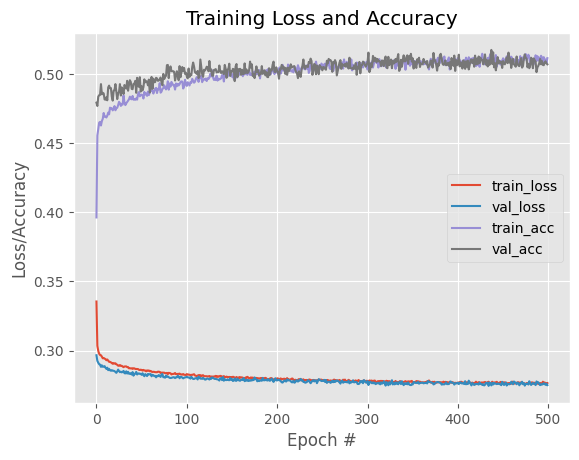

In [618]:
import matplotlib.pyplot as plt

# Muestro gráfica de accuracy y losses
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, 500), H.history["loss"], label="train_loss")
plt.plot(np.arange(0, 500), H.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, 500), H.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, 500), H.history["val_accuracy"], label="val_acc")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend()

In [619]:
print(type(X_training))
# Hacer predicciones
predicciones = model.predict(X_test)
print("Predicciones:")
display(X_training.head(1))
print(predicciones[0])
print("Real")
display(y_training_oh.head(1))

<class 'pandas.core.frame.DataFrame'>
145/145 [==============================] - 0s 434us/step
Predicciones:


,sum_click,gender,region,highest_education,studied_credits
2935,-1.023614,0.928989,1.113127,0.236378,1.549062


[4.3901169e-01 1.5507549e-01 6.7816421e-02 2.2091545e-01 3.8393565e-02
 9.5266990e-02 1.9225590e-05]
Real


,1,2,3,4,5,6,7
2935,True,False,False,False,False,False,False


In [607]:
#print(np.argmax(predicciones[0]))
results=np.array([])
x=0
ok=0
ok2=0
ok3=0
ok4=0
ok5=0
ok6=0
ok7=0
nok=0
nok2=0
nok3=0
nok4=0
nok5=0
nok6=0
nok7=0

for i in predicciones:
    results = np.append(results, np.argmax(i)+1)
    if results[x] == y_test.iloc[x]:
        ok=ok+1
    else:
        nok=nok+1
        i[np.argmax(i)] = 0
        seg = np.argmax(i)+1
        if seg == y_test.iloc[x]:
            ok2=ok2+1
        else:
            nok2 = nok2 + 1
            i[np.argmax(i)] = 0
            ter = np.argmax(i)+1
            if ter == y_test.iloc[x]:
                ok3=ok3+1
            else:
                nok3 = nok3 + 1
                i[np.argmax(i)] = 0
                cua = np.argmax(i)+1
                if cua == y_test.iloc[x]:
                    ok4=ok4+1
                else:
                    nok4 = nok4 + 1
                    i[np.argmax(i)] = 0
                    qui = np.argmax(i)+1
                    if qui == y_test.iloc[x]:
                        ok5=ok5+1
                    else:
                        nok5 = nok5 + 1
                        i[np.argmax(i)] = 0
                        sext = np.argmax(i)+1
                        if sext == y_test.iloc[x]:
                            ok6=ok6+1
                        else:
                            nok6 = nok6 + 1
                            i[np.argmax(i)] = 0
                            sie = np.argmax(i)+1
                            if sie == y_test.iloc[x]:
                                ok7=ok7+1
                            else:
                                nok7 = nok7 + 1
    x=x+1


print("OK: ", ok)
print("NOK: ", nok)
print("OK 2: ", ok2)
print("NOK 2: ", nok2)
print("OK 3: ", ok3)
print("NOK 3: ", nok3)
print("OK 4: ", ok4)
print("NOK 4: ", nok4)
print("OK 5: ", ok5)
print("NOK 5: ", nok5)
print("OK 6: ", ok6)
print("NOK 6: ", nok6)
print("OK 7: ", ok7)
print("NOK 7: ", nok7)
print("1", (ok)/(4612)*100)
print("2", (ok+ok2)/(4612)*100)
print("3", (ok+ok2+ok3)/(4612)*100)
print("4", (ok+ok2+ok3+ok4)/(4612)*100)
print("5", (ok+ok2+ok3+ok4+ok5)/(4612)*100)
print("6", (ok+ok2+ok3+ok4+ok5+ok6)/(4612)*100)
print("7", (ok+ok2+ok3+ok4+ok5+ok6+ok7)/(4612)*100)

OK:  2120
NOK:  2492
OK 2:  899
NOK 2:  1593
OK 3:  687
NOK 3:  906
OK 4:  448
NOK 4:  458
OK 5:  333
NOK 5:  125
OK 6:  98
NOK 6:  27
OK 7:  27
NOK 7:  0
1 45.96704249783174
2 65.45967042497833
3 80.35559410234173
4 90.06938421509106
5 97.2896790980052
6 99.41457068516912
7 100.0


In [531]:
# Se carga el resultado de las predicciones del algoritmo DT para comparar con el resultado de la red neuronal
results_DT = np.loadtxt('res/results_DT.csv', delimiter=';')


(18446, 7)


In [542]:
# Función que permite dejar en 1 las 3 probabilidades más altas en la predicción

def convertir_mayores_a_uno(array):
    # Crear una copia del array para no modificar el original
    result = np.zeros_like(array)
    
    # Procesar cada registro individualmente
    for i in range(array.shape[0]):
        # Obtener los índices de los 3 valores mayores
        indices_mayores = np.argpartition(array[i], -3)[-3:]
        # Asignar el valor 1 a los 3 mayores valores
        result[i, indices_mayores] = 1
    
    return result

In [543]:
predicciones_may=convertir_mayores_a_uno(predicciones)
print(predicciones[0])
print(predicciones_may[0])

[9.3694103e-01 3.2264313e-03 5.9053143e-03 4.6591751e-02 4.6212552e-03
 2.6919539e-03 2.2242353e-05]
[1. 0. 1. 1. 0. 0. 0.]


In [544]:
# Función que permite comparar los dos arrays de resultados de los dos modelos, entregando el porcentaje de coincidencia

def porcentaje_exito(array1, array2):
    # Asegurarse de que ambos arrays tengan la misma forma
    assert array1.shape == array2.shape, "Los arrays deben tener la misma forma"
    
    # Crear una máscara booleana donde los valores de ambos arrays sean 1 en la misma posición
    coincidencias = (array1 == 1) & (array2 == 1)
    
    # Contar el número de coincidencias
    num_coincidencias = np.sum(coincidencias)
    
    # Contar el número total de elementos en array1 que son 1
    num_total_1s = np.sum(array1 == 1)
    
    # Calcular el porcentaje de éxito
    if num_total_1s == 0:
        return 0.0  # Evitar división por cero si no hay 1s en array1
    porcentaje = (num_coincidencias / num_total_1s) * 100
    
    return porcentaje

In [558]:
# Calcular el porcentaje de éxito
porcentaje = porcentaje_exito(results_DT, predicciones_may)

print(f"Porcentaje de casos en los que coincide la sugerencia entre modelos: {porcentaje:.2f}%")

Porcentaje de casos en los que coincide la sugerencia entre modelos: 90.57%


In [620]:
# Guardar el modelo entrenado
model.save('modelo_cursos.h5')

/Users/dvelasquez/Library/Python/3.9/lib/python/site-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [333]:
# Listado de valores
val_courses = ['AAA', 'BBB', 'CCC', 'DDD', 'EEE', 'FFF', 'GGG']

# Crear un diccionario con números como índices y los elementos del listado como valores
dicc_courses = {i + 1: valor for i, valor in enumerate(val_courses)}

# Imprimir el diccionario resultante
print(dicc_courses[2])

BBB


In [334]:
# Listado de valores
val_act = ['forumng', 'oucontent', 'subpage', 'url', 'resource',
           'dataplus', 'glossary', 'oucollaborate', 'ouwiki',
           'folder', 'dualpane', 'ouelluminate', 'htmlactivity']

# Crear un diccionario con índices que comienzan en 1 y los elementos del listado como valores
dicc_act = {i + 1: valor for i, valor in enumerate(val_act)}

# Imprimir el diccionario resultante
print(dicc_act)
print(dicc_act[3])


{1: 'forumng', 2: 'oucontent', 3: 'subpage', 4: 'url', 5: 'resource', 6: 'dataplus', 7: 'glossary', 8: 'oucollaborate', 9: 'ouwiki', 10: 'folder', 11: 'dualpane', 12: 'ouelluminate', 13: 'htmlactivity'}
subpage


In [335]:
import sys
import tensorflow as tf
from tensorflow.keras import layers, models

# Cargar el modelo entrenado
modelo_courses = tf.keras.models.load_model('modelo_cursos.h5')
modelo_act = tf.keras.models.load_model('modelo_actividades.h5')

# Listado de valores
val_courses = ['AAA', 'BBB', 'CCC', 'DDD', 'EEE', 'FFF', 'GGG']
val_act = ['forumng', 'oucontent', 'subpage', 'url', 'resource',
           'dataplus', 'glossary', 'oucollaborate', 'ouwiki',
           'folder', 'dualpane', 'ouelluminate', 'htmlactivity']

# Creación de los diccionarios para los cursos y las actividades y recursos
dicc_courses = {i + 1: valor for i, valor in enumerate(val_courses)}
dicc_act = {i + 1: valor for i, valor in enumerate(val_act)}


def predicc_courses(datos_per):
    courses = usar_modelo_cursos(datos_per)
    resp_courses = "Te recomendamos estos cursos: " + dicc_courses[np.argsort(-courses)[0][0]+1] + ", " + dicc_courses[np.argsort(-courses)[0][1]+1] + ", " + dicc_courses[np.argsort(-courses)[0][2]+1] 
    return resp_courses

def usar_modelo_cursos(datos):
    # Utilizar el modelo para hacer predicciones de los cursos
    predicciones = modelo_courses.predict(datos)
    print(predicciones)
    return predicciones

def predicc_act(datos_per):
    activity = usar_modelo_act(datos_per)
    resp_courses = "Te recomendamos estas actividades: " +  dicc_act[np.argsort(-activity)[0][0]+1] + ", " + dicc_act[np.argsort(-activity)[0][1]+1] + ", " + dicc_act[np.argsort(-activity)[0][2]+1] 
    return resp_courses

def usar_modelo_act(datos):
    # Utilizar el modelo para hacer predicciones de las actividades y recursos
    predicciones = modelo_act.predict(datos)
    print(predicciones)
    return predicciones

In [337]:
from joblib import load

# Cargar los StandardScaler entrenados desde el archivo
scaler_courses = load('scaler_courses.joblib')
scaler_activity = load('scaler_activity.joblib')

# Cargar los SelectPercentile entrenados desde el archivo
selector_courses = load('selector_courses.joblib')
selector_activity = load('selector_activity.joblib')

perfil = "2,13,3,1,90"
datos_per = perfil.split(',')
#print(type(datos_per))

# 2      13                  3         1               90
#[ 0.92724127  1.62788966  0.19426558 -0.68792434  0.46224852]

datos_perfil = np.array(datos_per)
datos_perfil_fl = datos_perfil.astype(float)

datos_perfil_fl=datos_perfil_fl.reshape(1, -1)

#Se realiza la estandarización de los datos
datos_perfil_fl_st_co = scaler_courses.transform(datos_perfil_fl)
datos_perfil_fl_st_ac = scaler_activity.transform(datos_perfil_fl)

#Se elimina el dato que no es utilizado para la predicción
#datos_perfil_fl_st= np.delete(datos_perfil_fl_st, 3)
datos_perfil_fl_st_sel_co = selector_courses.transform(datos_perfil_fl_st_co)

datos_perfil_re=datos_perfil_fl_st_sel_co.reshape(1, 4)
print(datos_perfil_re)

# Llamar a la función predicc_courses() con los datos de perfil para obtener una predicción de los cursos
resultado_cursos = predicc_courses(datos_perfil_re)
print(resultado_cursos)

#datos_perfil_act= np.delete(datos_perfil_re, 1)
datos_perfil_fl_st_sel_ac = selector_courses.transform(datos_perfil_fl_st_ac)
datos_perfil_act_re=datos_perfil_fl_st_sel_ac.reshape(1, 4)
print(datos_perfil_act_re)

resultado_act = predicc_act(datos_perfil_act_re)
print(resultado_act)

[[0.92724127 1.62788966 0.19426558 0.46224852]]
1/1 [==============================] - 0s 10ms/step
[[0.00063608 0.00193326 0.23870032 0.2123628  0.1725504  0.38542804
  0.00182835]]
Te recomendamos estos cursos: FFF, CCC, DDD
[[0.75420397 1.62855384 0.12115486 0.37463477]]
1/1 [==============================] - 0s 22ms/step
[[0.2907376  0.28059638 0.09525326 0.25270396 0.00179308 0.04161149
  0.00990828 0.00474818 0.00219371 0.01753383 0.00561457 0.0017632
  0.00257307]]
Te recomendamos estas actividades: forumng, oucontent, url


/Users/dvelasquez/Library/Python/3.9/lib/python/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/Users/dvelasquez/Library/Python/3.9/lib/python/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
